In [6]:
import networkx as nx
from networkx.generators.community import LFR_benchmark_graph

In [95]:
n = 100000
tau1 = 3
tau2 = 1.5
mu = 0.1
G = LFR_benchmark_graph(
    n, tau1, tau2, mu, average_degree=7, min_community=10, seed=10
)

#nodes, tau1, tau2, mu, average_degree

In [ ]:
configuration = {
    'n':[100, 1000, 10000],
    'tau1': [3, 3.5],
    'tau2': [1.5, 2],
    'mu': [0.1, 0.2]
}

In [ ]:

configurations_possible = []

def get_possible_configs(conf, index, current):

    if index == len(conf):
        configurations_possible.append(current)
        return 

    here = list(conf.keys())[index]

    for value in conf[here]:
        current[here] = value
        get_possible_configs(conf, index + 1, current)


get_possible_configs(configuration, 0, {})



In [ ]:
for configuration in configurations_possible:
    print(configuration)
    G = LFR_benchmark_graph(configuration['n'], configuration['tau1'], \
        configuration['tau2'], configuration['mu'], average_degree=16, min_community=20, seed=10)
    #todo: acrescentar aqui as metricas
    break

{'n': 10000, 'tau1': 3.5, 'tau2': 2, 'mu': 0.2}


In [79]:
import math
print(G.number_of_edges())
print(math.sqrt(2*G.number_of_edges()))

337263
821.2953183843191


In [80]:
communities = {frozenset(G.nodes[v]["community"]) for v in G}


In [81]:
print(len(communities))

655


In [82]:
#for x in communities:
#    print(x)

In [83]:
from collections import defaultdict

size_comm = defaultdict(int)
for x in communities:
    size_comm[len(x)]+=1

size_comm = {k: v for k, v in sorted(size_comm.items(), key=lambda item: item[0], reverse=True)}
print(size_comm)

{852: 1, 840: 1, 818: 1, 811: 1, 807: 1, 785: 1, 783: 1, 758: 1, 753: 1, 727: 1, 725: 1, 690: 1, 667: 1, 665: 1, 657: 1, 651: 1, 639: 1, 620: 1, 611: 1, 608: 1, 605: 1, 604: 1, 598: 1, 597: 1, 574: 1, 572: 1, 570: 2, 567: 1, 551: 1, 548: 2, 547: 1, 544: 3, 527: 1, 525: 1, 519: 1, 518: 1, 510: 1, 503: 1, 496: 1, 495: 1, 485: 1, 482: 1, 479: 1, 473: 2, 470: 1, 453: 1, 452: 1, 451: 1, 449: 1, 447: 1, 443: 1, 437: 2, 435: 1, 433: 1, 431: 1, 429: 1, 426: 1, 423: 1, 421: 1, 416: 1, 411: 1, 407: 1, 405: 1, 403: 1, 392: 1, 388: 1, 387: 1, 386: 1, 375: 1, 374: 1, 371: 1, 369: 1, 362: 1, 361: 1, 358: 1, 350: 1, 348: 2, 347: 1, 328: 1, 325: 1, 320: 1, 319: 1, 318: 1, 317: 1, 316: 2, 314: 1, 310: 1, 309: 2, 307: 1, 304: 1, 301: 1, 295: 2, 294: 1, 293: 1, 292: 2, 286: 3, 284: 1, 283: 1, 282: 2, 276: 1, 274: 1, 266: 1, 264: 1, 258: 1, 256: 1, 249: 1, 247: 1, 246: 1, 241: 1, 238: 1, 236: 1, 234: 1, 233: 2, 232: 1, 231: 1, 230: 1, 227: 1, 224: 1, 222: 2, 218: 1, 217: 1, 215: 2, 214: 1, 211: 1, 210: 2,

In [84]:
import community.community_louvain as community_louvain

In [85]:
partion = community_louvain.best_partition(G)

found_comm = defaultdict(int)
for node, community in partion.items():
    found_comm[community]+=1

# (community_nr, nr_nodes)

another = defaultdict(int)

for cnr, c in found_comm.items():
    another[c]+=1

another = {k: v for k, v in sorted(another.items(), key=lambda item: item[0], reverse=True)}


print(another)

{1260: 1, 1013: 1, 1004: 1, 1001: 1, 965: 1, 931: 1, 906: 1, 877: 1, 841: 1, 820: 1, 804: 1, 802: 1, 788: 1, 785: 1, 784: 1, 783: 1, 782: 1, 776: 1, 768: 1, 755: 1, 745: 1, 733: 1, 725: 1, 721: 1, 720: 1, 717: 1, 713: 1, 701: 1, 697: 1, 694: 1, 686: 1, 681: 2, 657: 1, 648: 1, 646: 1, 644: 1, 639: 1, 637: 1, 634: 1, 623: 1, 619: 1, 614: 1, 610: 1, 606: 1, 605: 1, 601: 1, 598: 2, 596: 2, 595: 1, 591: 1, 580: 1, 577: 1, 574: 1, 569: 1, 568: 1, 567: 1, 554: 1, 544: 1, 542: 2, 521: 1, 519: 1, 516: 1, 514: 2, 511: 3, 509: 1, 504: 1, 501: 1, 499: 1, 494: 1, 493: 1, 489: 1, 486: 1, 484: 1, 481: 1, 474: 2, 473: 1, 472: 1, 471: 1, 469: 1, 464: 2, 463: 1, 455: 1, 450: 1, 448: 1, 447: 1, 439: 1, 431: 1, 428: 1, 424: 1, 423: 1, 421: 1, 420: 1, 419: 2, 415: 1, 412: 2, 407: 3, 402: 1, 401: 1, 400: 1, 396: 1, 394: 1, 391: 1, 385: 1, 383: 1, 381: 1, 372: 2, 370: 1, 369: 1, 367: 1, 365: 2, 362: 1, 360: 1, 354: 1, 348: 1, 344: 1, 342: 1, 341: 1, 340: 1, 337: 1, 336: 1, 334: 1, 333: 1, 330: 1, 328: 3, 325

In [86]:
temp_dict = defaultdict()

c = 1
for y in communities:
    temp_dict[c] = y
    c+= 1



In [87]:
coisas = defaultdict(set)
for node, community in partion.items():
    coisas[community].add(node) # (community_nr, nodes)



valor_bonito = []
assigned_ones = defaultdict(list)# sets from the louvain that are assigned as most similar to the same set of the lrf
valores = []
inesperado = []

for k ,y in temp_dict.items(): # (com_nr, set community) do lrf
    higher = -1
    target_set = set()
    contador_inesperado = 0
    for blah, x in coisas.items(): # (comm_nr2, set community) do louvain

        temp = x & y
        if higher < len(temp):
            higher = len(temp)
            target_set = temp
            rrr = blah
            contador_inesperado+=1
    
    if higher !=-1:
        valor_bonito.append(target_set)
        assigned_ones[rrr].append(k)
        valores.append(k)

    if contador_inesperado > 1:
        inesperado.append(k)


c = 0
for x in valor_bonito:
    c+=len(x)


assigned_ones = {k: v for k, v in sorted(assigned_ones.items(), key=lambda item: len(item[1]), reverse=True)}

print(c/G.number_of_nodes())
print(len(inesperado), inesperado)
print(assigned_ones)


0.98626
654 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [88]:
contador = 0
for a, b in assigned_ones.items():
    contador += len(b)

print(len(assigned_ones))
print(len(coisas))


236
236


In [89]:

intersection_value_metric = 0

for a, b in assigned_ones.items():
    z = set()
    for v in b:
        z = z.union(temp_dict[v])
    
    #assert len(z) == len(coisas[a])
    tamanho = z.intersection(set(coisas[a]))
    #assert len(z) == len(tamanho)
    intersection_value_metric += len(tamanho)

print(intersection_value_metric/G.number_of_nodes())

0.98626


In [90]:
import networkx.algorithms.community as nxcomm
nxcomm.modularity(G,coisas.values())


0.8796087364861563

In [91]:
nxcomm.modularity(G,temp_dict.values())


0.8889678445387773

In [92]:
max(partion.values())

235

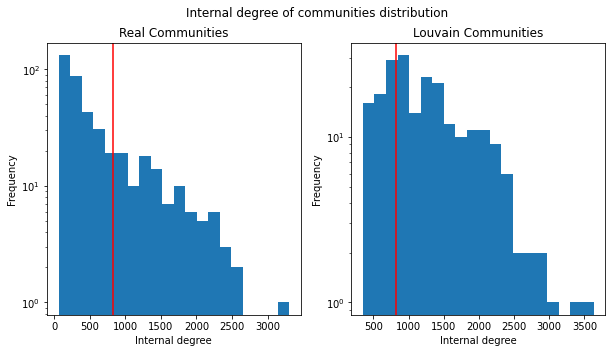

In [93]:
#coisas.values() -> louvain
#temp_dict.values() -> lfr
import collections
import matplotlib.pyplot as plt
import seaborn as sns
def community_size_distribution(partition,partition2):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
    fig.suptitle('Internal degree of communities distribution')
    res_limit_val = math.sqrt(2*G.number_of_edges())
    counter=collections.Counter([G.subgraph(x).number_of_edges() for x in partition])
    counter2=collections.Counter([G.subgraph(x).number_of_edges() for x in partition2])
    ax1.hist(counter,bins=20)
    ax2.hist(counter2,bins=20)
    ax1.axvline(x=res_limit_val, color= 'r')
    ax2.axvline(x=res_limit_val, color= 'r')
    ax1.set_yscale('log')
    ax2.set_yscale('log')
    ax1.set(title='Real Communities', ylabel='Frequency',xlabel='Internal degree')
    ax2.set(title='Louvain Communities', ylabel='Frequency',xlabel='Internal degree')


community_size_distribution(temp_dict.values(),coisas.values())


In [94]:
print(len(temp_dict.values()))
print(len(coisas.values()))

655
236
